In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
# Obtener Token de : https://www.banxico.org.mx/SieAPIRest/service/v1/token
token= '5c22e764c163e1336fad0d4f0b10dddf77aadfba51dbedb329f967a1a016c173'

#Series= "SF43936,SF43939,SF43942,SF43945"  CETES

Series="SF57817,SF329"

url = 'https://www.banxico.org.mx/SieAPIRest/service/v1/series/'+Series+'/datos'
headers = {'Accept':'application/json',
           'Bmx-Token': token}


respuesta = requests.get(url,headers=headers)
respuesta.close()
res = respuesta.json()

In [6]:
res

{'bmx': {'series': [{'idSerie': 'SF57817',
    'titulo': 'GTQ Guatemala (Quetzal)',
    'datos': [{'fecha': '01/01/2000', 'dato': '1.23396'},
     {'fecha': '01/02/2000', 'dato': '1.21452'},
     {'fecha': '01/03/2000', 'dato': '1.21525'},
     {'fecha': '01/04/2000', 'dato': '1.22318'},
     {'fecha': '01/05/2000', 'dato': '1.23833'},
     {'fecha': '01/06/2000', 'dato': '1.26596'},
     {'fecha': '01/07/2000', 'dato': '1.21880'},
     {'fecha': '01/08/2000', 'dato': '1.17790'},
     {'fecha': '01/09/2000', 'dato': '1.20870'},
     {'fecha': '01/10/2000', 'dato': '1.21982'},
     {'fecha': '01/11/2000', 'dato': '1.21328'},
     {'fecha': '01/12/2000', 'dato': '1.24639'},
     {'fecha': '01/01/2001', 'dato': '1.23969'},
     {'fecha': '01/02/2001', 'dato': '1.26162'},
     {'fecha': '01/03/2001', 'dato': '1.23128'},
     {'fecha': '01/04/2001', 'dato': '1.17883'},
     {'fecha': '01/05/2001', 'dato': '1.18495'},
     {'fecha': '01/06/2001', 'dato': '1.16297'},
     {'fecha': '01/07/200

In [2]:
res['bmx']['series'][0].keys()

KeyError: 'bmx'

In [3]:
for x in res['bmx']['series']:
    print(x['idSerie'], ' : ', x['titulo'])

SF43936  :  Valores gubernamentales                        Resultados de la subasta semanal Tasa de rendimiento                            Cetes a 28 días
SF43942  :  Valores gubernamentales                        Resultados de la subasta semanal Tasa de rendimiento                            Cetes a 182 días
SF43939  :  Valores gubernamentales                        Resultados de la subasta semanal Tasa de rendimiento                            Cetes a 91 días
SF43945  :  Valores gubernamentales                        Resultados de la subasta semanal Tasa de rendimiento                            Cetes a 364 días


In [4]:
MENSUAL = {'fecha' : [],
        'interes' : []
       }
TRIMESTRAL = {'fecha' : [],
        'interes' : []
       }
SEMESTRAL = {'fecha' : [],
        'interes' : []
       }
ANUAL = {'fecha' : [],
        'interes' : []
       }

In [5]:
for x in res['bmx']['series']:
    for y in x['datos']:
        if x['idSerie']=='SF43936':
            MENSUAL['fecha'].append(y['fecha'])
            if y['dato']=='N/E':
                MENSUAL['interes'].append(0)
            else:
                MENSUAL['interes'].append(y['dato'])
                
        elif x['idSerie']=='SF43939':
            TRIMESTRAL['fecha'].append(y['fecha'])
            if y['dato']=='N/E':
                TRIMESTRAL['interes'].append(0)
            else:
                TRIMESTRAL['interes'].append(y['dato'])
        elif x['idSerie']=='SF43942':
            SEMESTRAL['fecha'].append(y['fecha'])
            if y['dato']=='N/E':
                SEMESTRAL['interes'].append(0)
            else:
                SEMESTRAL['interes'].append(y['dato'])
        else :
            ANUAL['fecha'].append(y['fecha'])
            if y['dato']=='N/E':
                ANUAL['interes'].append(0)
            else:
                ANUAL['interes'].append(y['dato'])

In [6]:
Mes = pd.DataFrame(MENSUAL)
Trim = pd.DataFrame(TRIMESTRAL)
Sem = pd.DataFrame(SEMESTRAL)
Anual = pd.DataFrame(ANUAL)

In [7]:
#indice= Mes.index[Mes['fecha']=='2019-12-09'].tolist()
#Mes.set_value(indice,'fecha','2019-09-12')


In [8]:
Mes['fecha'] = pd.to_datetime(Mes['fecha'],format="%d/%m/%Y")
Trim['fecha'] = pd.to_datetime(Trim['fecha'],format="%d/%m/%Y")
Sem['fecha'] = pd.to_datetime(Sem['fecha'],format="%d/%m/%Y")
Anual['fecha'] = pd.to_datetime(Anual['fecha'],format="%d/%m/%Y")

In [9]:

Mes.sort_values('fecha',axis = 0, ascending=True, inplace=True)
Trim.sort_values('fecha',axis = 0, ascending=True, inplace=True)
Sem.sort_values('fecha',axis = 0, ascending=True, inplace=True)
Anual.sort_values('fecha',axis = 0, ascending=True, inplace=True)


In [10]:
Mes['interes'] = Mes['interes'].astype('float64')
Trim['interes'] = Trim['interes'].astype('float64')
Sem['interes'] = Sem['interes'].astype('float64')
Anual['interes'] = Anual['interes'].astype('float64')

In [11]:
 Anual = Anual[Anual['interes']!=0]

C:\Users\Israel\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


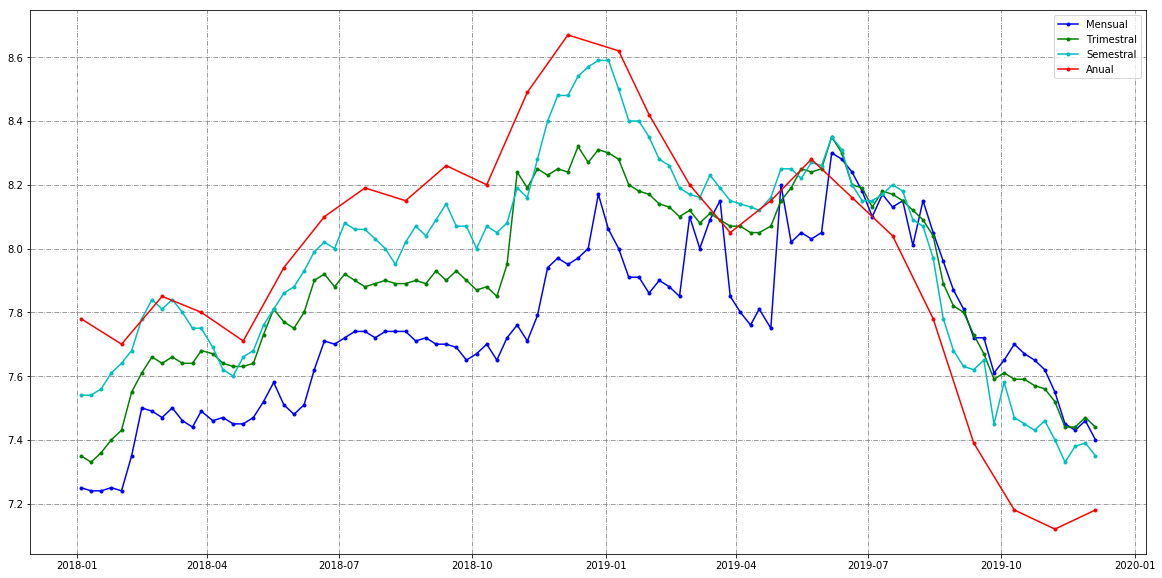

In [12]:
plt.figure(figsize=(20,10))
fec='2018-01-01'

plt.plot(Mes[Mes['fecha']>=fec]['fecha'],Mes[Mes['fecha']>=fec]['interes'],label='Mensual',marker='.',color='b')
plt.plot(Trim[Trim['fecha']>=fec]['fecha'],Trim[Trim['fecha']>=fec]['interes'],label='Trimestral',marker='.',color='g')
plt.plot(Sem[Sem['fecha']>=fec]['fecha'],Sem[Sem['fecha']>=fec]['interes'],label='Semestral',marker='.',color='c')
plt.plot(Anual[Anual['fecha']>=fec]['fecha'],Anual[Anual['fecha']>=fec]['interes'],label='Anual',linestyle='-',marker='.',color='r')
plt.legend()
plt.grid(color='gray',linestyle='-.',linewidth='0.75')
plt.show()

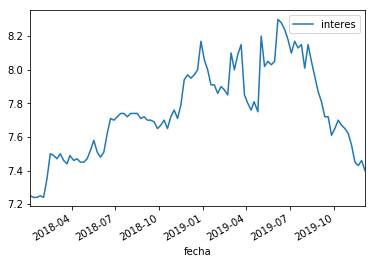

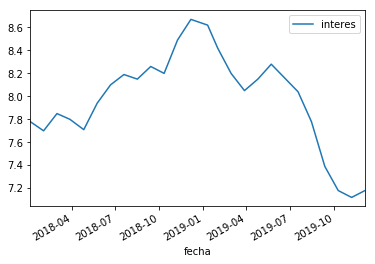

In [13]:
Mes[Mes['fecha']>=fec].plot(x='fecha',y='interes',kind='line')
Anual[Anual['fecha']>=fec].plot(x='fecha',y='interes',kind='line')
plt.show()


### Calculamos el precio del cete

In [14]:
for w,z in Mes.iterrows():
    Mes['precio'] = 10/(1+((Mes['interes']/100)*28/360))

for w,z in Trim.iterrows():
    Trim['precio'] = 10/(1+((Trim['interes']/100)*91/360))


for w,z in Sem.iterrows():
    Sem['precio'] = 10/(1+((Sem['interes']/100)*182/360))


for w,z in Anual.iterrows():
    Anual['precio'] = 10/(1+((Anual['interes']/100)*360/360))


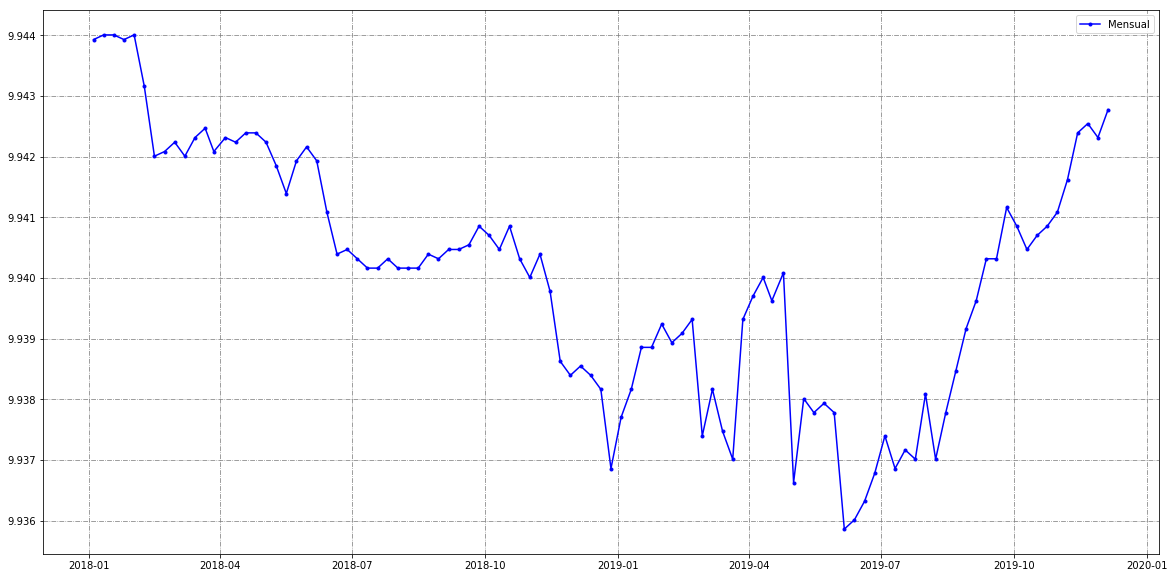

In [15]:
plt.figure(figsize=(20,10)) 
#plt.ylim(9.9,10)
plt.plot(Mes[Mes['fecha']>=fec]['fecha'],Mes[Mes['fecha']>=fec]['precio'],label='Mensual',marker='.',color='b')
#plt.plot(Trim[Trim['fecha']>=fec]['fecha'],Trim[Trim['fecha']>=fec]['precio'],label='Trimestral',marker='.',color='g')
#plt.plot(Sem[Sem['fecha']>=fec]['fecha'],Sem[Sem['fecha']>=fec]['precio'],label='Semestral',marker='.',color='c')
#plt.plot(Anual[Anual['fecha']>=fec]['fecha'],Anual[Anual['fecha']>=fec]['precio'],label='Anual',linestyle='-',marker='.',color='r')
plt.legend()
plt.grid(color='gray',linestyle='-.',linewidth='0.75')
plt.show()

In [16]:
Mes[-1:]

fecha  interes    precio
1944 2019-12-05      7.4  9.942774